In [1]:
import pandas as pd

# Load the train and dev CSV files
train_df = pd.read_csv('/kaggle/input/mesogyny-train-dev-test/train/train.csv')
dev_df = pd.read_csv('/kaggle/input/mesogyny-train-dev-test/dev/dev.csv')
test_df = pd.read_csv('/kaggle/input/mesogyny-train-dev-test/test/test.csv')
# Check the first few rows of the train data
print("TRAIN DATA\n\n",train_df.head())
print("DEV DATA\n\n", dev_df.head())
print("TEST DATA\n\n", test_df.head())

TRAIN DATA

   image_name        labels                  transcriptions
0   1134.jpg      Misogyny  如果结婚是好事的话 按照我国的国情 应该托关系走后门才能结婚
1    901.jpg  Not-Misogyny                        狠狠期待 好了嘛
2    683.jpg      Misogyny         为什么不生孩子？ 让男的生呗 他们不是先生嘛？
3    768.jpg  Not-Misogyny        搞不懂呢 你知道滴 我不过是 来自大山深处的吗喽
4    178.jpg  Not-Misogyny                 买完同款买同款 家里可以开展览
DEV DATA

   image_name        labels                                     transcriptions
0    423.jpg  Not-Misogyny                                   想我的生活...总是差一点就顺呐
1    204.jpg      Misogyny                 孩子不听话是你不对 孩子学习成绩不好 还是你不对 EN EN 听我说
2    571.jpg      Misogyny                       同事： 你啥时候生孩子啊 我： 你是不是着急投胎叫我妈啊
3    323.jpg  Not-Misogyny                                              去你的调休
4   1403.jpg  Not-Misogyny  国庆7天+中秋3天 调休完等于总共放4天 上次遇到这种7+3=4的题目 还是树上骑个猴地上三...
TEST DATA

   image_name                                     transcriptions
0   1582.jpg                                        光顾着上学 忘记上吊了
1   1305.jpg  

In [2]:
# Example: Assume 'train.csv' has columns 'image_name' and 'label'
train_df['image_path'] = train_df['image_name'].apply(lambda x: f'/kaggle/input/mesogyny-train-dev-test/train/train images{x}')

# Now you can access image paths and labels together
print("TRAIN DATA IMAGES\n", train_df[['image_name', 'image_path', 'labels']].head())


# Example: Assume 'train.csv' has columns 'image_name' and 'label'
dev_df['image_path'] = dev_df['image_name'].apply(lambda x: f'/kaggle/input/mesogyny-train-dev-test/dev/dev images{x}')

# Now you can access image paths and labels together
print("DEV DATA IMAGES\n", dev_df[['image_name', 'image_path', 'labels']].head())


# Example: Assume 'train.csv' has columns 'image_name' and 'label'
# Example: Assume 'test.csv' has columns 'image_name'
test_df['image_path'] = test_df['image_name'].apply(lambda x: f'/kaggle/input/mesogyny-train-dev-test/test/test images{x}')

# Now you can access image paths together (note: test data doesn't have 'labels' column)
print("TEST DATA IMAGES\n", test_df[['image_name', 'image_path']].head())


TRAIN DATA IMAGES
   image_name                                         image_path        labels
0   1134.jpg  /kaggle/input/mesogyny-train-dev-test/train/tr...      Misogyny
1    901.jpg  /kaggle/input/mesogyny-train-dev-test/train/tr...  Not-Misogyny
2    683.jpg  /kaggle/input/mesogyny-train-dev-test/train/tr...      Misogyny
3    768.jpg  /kaggle/input/mesogyny-train-dev-test/train/tr...  Not-Misogyny
4    178.jpg  /kaggle/input/mesogyny-train-dev-test/train/tr...  Not-Misogyny
DEV DATA IMAGES
   image_name                                         image_path        labels
0    423.jpg  /kaggle/input/mesogyny-train-dev-test/dev/dev ...  Not-Misogyny
1    204.jpg  /kaggle/input/mesogyny-train-dev-test/dev/dev ...      Misogyny
2    571.jpg  /kaggle/input/mesogyny-train-dev-test/dev/dev ...      Misogyny
3    323.jpg  /kaggle/input/mesogyny-train-dev-test/dev/dev ...  Not-Misogyny
4   1403.jpg  /kaggle/input/mesogyny-train-dev-test/dev/dev ...  Not-Misogyny
TEST DATA IMAGES
   image_na

In [3]:
!apt-get install tesseract-ocr-chi-sim
!pip install transformers torch torchvision efficientnet_pytorch





The following NEW packages will be installed:
  tesseract-ocr-chi-sim
0 upgraded, 1 newly installed, 0 to remove and 129 not upgraded.
Need to get 1,634 kB of archives.
After this operation, 2,484 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-chi-sim all 1:4.00~git30-7274cfa-1.1 [1,634 kB]
Fetched 1,634 kB in 1s (2,165 kB/s)
Selecting previously unselected package tesseract-ocr-chi-sim.
(Reading database ... 127400 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-chi-sim_1%3a4.00~git30-7274cfa-1.1_all.deb ...
Unpacking tesseract-ocr-chi-sim (1:4.00~git30-7274cfa-1.1) ...
Setting up tesseract-ocr-chi-sim (1:4.00~git30-7274cfa-1.1) ...
  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16424 sha256=9e52a306c81a83ce1a275e2e33fbd43d53d69ebd10ea6c3d41b39e7827e74571
  Stored in directory: /root/.cac

In [4]:
import jieba

# Tokenize the transcriptions in the train and dev datasets
train_df['tokenized_text'] = train_df['transcriptions'].apply(lambda x: list(jieba.cut(x)))
dev_df['tokenized_text'] = dev_df['transcriptions'].apply(lambda x: list(jieba.cut(x)))

# Display tokenized text
print("TRAIN DATA WITH TOKENIZED TEXT:\n", train_df[['image_name', 'tokenized_text']].head())
print("DEV DATA WITH TOKENIZED TEXT:\n", dev_df[['image_name', 'tokenized_text']].head())


Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.890 seconds.
Prefix dict has been built successfully.


TRAIN DATA WITH TOKENIZED TEXT:
   image_name                                     tokenized_text
0   1134.jpg  [如果, 结婚, 是, 好事, 的话,  , 按照, 我国, 的, 国情,  , 应该, 托...
1    901.jpg                               [狠狠, 期待,  , 好, 了, 嘛]
2    683.jpg  [为什么, 不生, 孩子, ？,  , 让, 男, 的, 生, 呗,  , 他们, 不是, ...
3    768.jpg  [搞不懂, 呢,  , 你, 知道, 滴,  , 我, 不过, 是,  , 来自, 大山深处...
4    178.jpg                  [买, 完同款, 买, 同款,  , 家里, 可以, 开, 展览]
DEV DATA WITH TOKENIZED TEXT:
   image_name                                     tokenized_text
0    423.jpg                 [想, 我, 的, 生活, ..., 总是, 差一点, 就, 顺呐]
1    204.jpg  [孩子, 不听话, 是, 你, 不, 对,  , 孩子, 学习成绩, 不好,  , 还是, ...
2    571.jpg  [同事, ：,  , 你, 啥时候, 生, 孩子, 啊,  , 我, ：,  , 你, 是不...
3    323.jpg                                      [去, 你, 的, 调休]
4   1403.jpg  [国庆, 7, 天, +, 中秋, 3, 天,  , 调休, 完, 等于, 总共, 放, 4...


In [5]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
!pip install jieba
!pip install nltk


In [7]:
import jieba
import re
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords (if you haven't already)
nltk.download('stopwords')

# Load Chinese stopwords (you can provide a list or download from an external source)
# Example: Download a Chinese stopwords list or use your own
stop_words = set(stopwords.words('english'))  # English stopwords will be used here

# Function to clean Chinese text, removing punctuation, spaces, numbers, and stopwords
def clean_text_both(text):
    # Remove unwanted characters like punctuation, special symbols, and numbers
    text = re.sub(r'[^\w\s，。！？：；（）【】‘’“”]', '', text)  # Remove punctuation and symbols
    text = re.sub(r'[0-9]', '', text)  # Remove digits
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    
    # Tokenize the text using Jieba
    tokenized_text = list(jieba.cut(text))

    # Remove stopwords (for both Chinese and English words)
    cleaned_tokens = [word for word in tokenized_text if word not in stop_words]

    return " ".join(cleaned_tokens)

# Apply the cleaning function to the 'transcriptions' column in train and dev datasets
train_df['cleaned_text'] = train_df['transcriptions'].apply(clean_text_both)
dev_df['cleaned_text'] = dev_df['transcriptions'].apply(clean_text_both)

# Display cleaned text
print("TRAIN DATA WITH CLEANED TEXT:\n", train_df[['image_name', 'cleaned_text']].head())
print("DEV DATA WITH CLEANED TEXT:\n", dev_df[['image_name', 'cleaned_text']].head())


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
TRAIN DATA WITH CLEANED TEXT:
   image_name                                   cleaned_text
0   1134.jpg  如果 结婚 是 好事 的话   按照 我国 的 国情   应该 托关系 走后门 才能 结婚
1    901.jpg                                  狠狠 期待   好 了 嘛
2    683.jpg         为什么 不生 孩子 ？   让 男 的 生 呗   他们 不是 先生 嘛 ？
3    768.jpg        搞不懂 呢   你 知道 滴   我 不过 是   来自 大山深处 的 吗 喽
4    178.jpg                        买 完同款 买 同款   家里 可以 开 展览
DEV DATA WITH CLEANED TEXT:
   image_name                                       cleaned_text
0    423.jpg                               想 我 的 生活 总是 差一点 就 顺呐
1    204.jpg  孩子 不听话 是 你 不 对   孩子 学习成绩 不好   还是 你 不 对   EN   ...
2    571.jpg    同事 ：   你 啥时候 生 孩子 啊   我 ：   你 是不是 着急 投胎 叫 我 妈 啊
3    323.jpg                                           去 你 的 调休
4   1403.jpg  国庆 天中 秋天   调休 完 等于 总共 放天   上次 遇到 这种 的 题目   还是 ...


In [8]:
!pip install transformers
!pip install torch


In [9]:
from transformers import BertTokenizer, BertModel
import torch
import jieba

# Load the Chinese BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')
bert_model = BertModel.from_pretrained('bert-base-chinese')

def get_bert_embeddings(text):
    tokens = jieba.cut(text)  # Tokenize the Chinese text using jieba
    text = " ".join(tokens)  # Join tokens back to a string

    # Tokenize and encode the text into BERT-compatible format
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    # Ensure to pass input_ids and attention_mask to the model
    with torch.no_grad():
        outputs = bert_model(**inputs)  # Unpack inputs and pass to the model
    return outputs.last_hidden_state[:, 0, :].squeeze().numpy()  # [CLS] token embedding


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/269k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/624 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/412M [00:00<?, ?B/s]

In [10]:
from transformers import BertTokenizer, BertModel

# Load Chinese BERT tokenizer and model
from transformers import BertTokenizer, BertModel

# Load Chinese BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')
bert_model = BertModel.from_pretrained('bert-base-chinese')
bert_model.eval()  # Set BERT to evaluation mode

# Function to get BERT embeddings
def get_bert_embeddings(text):
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=128)

    # Get BERT output without computing gradients
    with torch.no_grad():
        outputs = bert_model(**inputs)

    # Extract [CLS] token embedding
    cls_embedding = outputs.last_hidden_state[:, 0, :]  # [batch_size, hidden_size]
    
    return cls_embedding.squeeze().numpy()  # Convert to numpy array


# Apply the function to get embeddings for the cleaned text
train_df['bert_embeddings'] = train_df['cleaned_text'].apply(lambda x: get_bert_embeddings(x))
dev_df['bert_embeddings'] = dev_df['cleaned_text'].apply(lambda x: get_bert_embeddings(x))

# Check the first few rows to ensure embeddings were created
print("TRAIN DATA WITH BERT EMBEDDINGS:\n", train_df[['image_name', 'bert_embeddings']].head())
print("DEV DATA WITH BERT EMBEDDINGS:\n", dev_df[['image_name', 'bert_embeddings']].head())


TRAIN DATA WITH BERT EMBEDDINGS:
   image_name                                    bert_embeddings
0   1134.jpg  [0.4363898, 0.37741575, 0.13698938, 0.4502089,...
1    901.jpg  [-0.15306963, 1.0790474, -0.2567168, 0.1565221...
2    683.jpg  [0.15989126, 0.3260317, -0.08702595, 0.3189988...
3    768.jpg  [1.1844454, 0.81450576, 0.66502184, 0.24094835...
4    178.jpg  [-1.0086261, 0.6670497, -0.31943998, 0.1463093...
DEV DATA WITH BERT EMBEDDINGS:
   image_name                                    bert_embeddings
0    423.jpg  [0.36797416, 0.491952, 0.44757572, 0.20837165,...
1    204.jpg  [0.16950239, 0.23350427, -0.38106236, 0.500918...
2    571.jpg  [0.79500705, -0.098331, -0.8560504, 0.84438163...
3    323.jpg  [-0.05242703, 0.81574136, 0.54027045, -0.47500...
4   1403.jpg  [-0.2953164, 0.3672528, -0.67304975, -0.018100...


In [11]:
!pip install torch torchvision


In [12]:
# Assuming 'image_name' contains the image file names
train_df['image_path'] = train_df['image_name'].apply(lambda x: f'/kaggle/input/mesogyny-train-dev-test/train/train images/{x}')
dev_df['image_path'] = dev_df['image_name'].apply(lambda x: f'/kaggle/input/mesogyny-train-dev-test/dev/dev images/{x}')
test_df['image_path'] = test_df['image_name'].apply(lambda x: f'/kaggle/input/mesogyny-train-dev-test/test/test images/{x}')

# Verify the image paths
print("TRAIN DATA IMAGE PATHS:\n", train_df[['image_name', 'image_path']].head())
print("DEV DATA IMAGE PATHS:\n", dev_df[['image_name', 'image_path']].head())


TRAIN DATA IMAGE PATHS:
   image_name                                         image_path
0   1134.jpg  /kaggle/input/mesogyny-train-dev-test/train/tr...
1    901.jpg  /kaggle/input/mesogyny-train-dev-test/train/tr...
2    683.jpg  /kaggle/input/mesogyny-train-dev-test/train/tr...
3    768.jpg  /kaggle/input/mesogyny-train-dev-test/train/tr...
4    178.jpg  /kaggle/input/mesogyny-train-dev-test/train/tr...
DEV DATA IMAGE PATHS:
   image_name                                         image_path
0    423.jpg  /kaggle/input/mesogyny-train-dev-test/dev/dev ...
1    204.jpg  /kaggle/input/mesogyny-train-dev-test/dev/dev ...
2    571.jpg  /kaggle/input/mesogyny-train-dev-test/dev/dev ...
3    323.jpg  /kaggle/input/mesogyny-train-dev-test/dev/dev ...
4   1403.jpg  /kaggle/input/mesogyny-train-dev-test/dev/dev ...


In [13]:
# from transformers import ViTFeatureExtractor, ViTModel
# import torch
# from PIL import Image
# import numpy as np

# # Load the pre-trained ViT model and feature extractor from Hugging Face
# feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")
# vit_model = ViTModel.from_pretrained("google/vit-base-patch16-224-in21k")
# vit_model.eval()  # Set the model to evaluation mode

# # Function to extract image features using ViT
# def extract_image_features_vit(image_path):
#     img = Image.open(image_path).convert("RGB")  # Convert the image to RGB
#     # Preprocess image using ViT feature extractor
#     inputs = feature_extractor(images=img, return_tensors="pt")
    
#     # Extract features from ViT
#     with torch.no_grad():
#         outputs = vit_model(**inputs)
    
#     # We typically use the output of the [CLS] token as the image representation
#     return outputs.last_hidden_state[:, 0, :].squeeze().numpy()  # Extract the [CLS] token feature and convert to numpy array

# # Apply image feature extraction to all images in the train and dev datasets
# train_df['image_features'] = train_df['image_path'].apply(extract_image_features_vit)
# dev_df['image_features'] = dev_df['image_path'].apply(extract_image_features_vit)

# # Display the extracted image features (you can skip this step if not needed)
# print("TRAIN DATA WITH IMAGE FEATURES:\n", train_df[['image_name', 'image_features']].head())
# print("DEV DATA WITH IMAGE FEATURES:\n", dev_df[['image_name', 'image_features']].head())


In [14]:
import torch
from torchvision import transforms
from PIL import Image
from transformers import ViTFeatureExtractor, ViTModel
import numpy as np
import pandas as pd

# Load the pre-trained ViT model and feature extractor from Hugging Face
feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")
vit_model = ViTModel.from_pretrained("google/vit-base-patch16-224-in21k")
vit_model.eval()  # Set the model to evaluation mode

# Image augmentation transforms
augmentation_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),        # Random horizontal flip
    transforms.RandomRotation(30),            # Random rotation between -30 and 30 degrees
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),  # Random color jitter
    transforms.RandomResizedCrop(224),        # Random crop and resize to 224x224
    transforms.RandomAffine(degrees=15),      # Random affine transformation (rotation, scale, shear)
])

# Function to extract image features using ViT with augmentation
def extract_image_features_vit(image_path, apply_augmentation=False):
    img = Image.open(image_path).convert("RGB")  # Convert the image to RGB
    
    # Apply augmentation if needed
    if apply_augmentation:
        img = augmentation_transforms(img)
    
    # Preprocess image using ViT feature extractor
    inputs = feature_extractor(images=img, return_tensors="pt")
    
    # Extract features from ViT
    with torch.no_grad():
        outputs = vit_model(**inputs)
    
    # Extract the [CLS] token feature and convert to numpy array
    return outputs.last_hidden_state[:, 0, :].squeeze().numpy()

# Assuming train_df and dev_df have 'image_path' and 'image_name' columns

# Apply image feature extraction with augmentation to all images in the train and dev datasets
train_df['image_features'] = train_df['image_path'].apply(lambda x: extract_image_features_vit(x, apply_augmentation=True))
dev_df['image_features'] = dev_df['image_path'].apply(lambda x: extract_image_features_vit(x, apply_augmentation=False))  # No augmentation for validation

# Display the extracted image features (you can skip this step if not needed)
print("TRAIN DATA WITH IMAGE FEATURES:\n", train_df[['image_name', 'image_features']].head())
print("DEV DATA WITH IMAGE FEATURES:\n", dev_df[['image_name', 'image_features']].head())


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

TRAIN DATA WITH IMAGE FEATURES:
   image_name                                     image_features
0   1134.jpg  [0.012215571, 0.0059829457, -0.28279126, 0.016...
1    901.jpg  [0.47496694, -0.33327162, -0.054281224, -0.069...
2    683.jpg  [-0.102571175, 0.2033328, -0.044695508, -0.057...
3    768.jpg  [-0.20243804, -0.18583988, -0.304715, -0.10756...
4    178.jpg  [-0.16304779, -0.10128494, 0.07900019, 0.02423...
DEV DATA WITH IMAGE FEATURES:
   image_name                                     image_features
0    423.jpg  [0.033170782, -0.39748764, 0.041373886, 0.1310...
1    204.jpg  [-0.04839237, -0.13067287, -0.019300817, -0.11...
2    571.jpg  [-0.05292566, -0.12414183, -0.08115562, -0.175...
3    323.jpg  [-0.16896205, -0.36463255, -0.41247243, 0.2950...
4   1403.jpg  [-0.20641461, -0.22735254, 0.05065968, -0.1373...


In [15]:

# Example: Assume text and image features are already extracted and available in train_df and dev_df
# Convert features to torch tensors
X_train_text = torch.tensor(np.vstack(train_df['bert_embeddings'].values)).float()  # Text embeddings
X_train_image = torch.tensor(np.vstack(train_df['image_features'].values)).float()  # Image features

X_dev_text = torch.tensor(np.vstack(dev_df['bert_embeddings'].values)).float()
X_dev_image = torch.tensor(np.vstack(dev_df['image_features'].values)).float()


In [16]:
# Define the device (CUDA if available, else CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [17]:
X_train_text = torch.tensor(np.vstack(train_df['bert_embeddings'].values)).float().to(device)
X_train_image = torch.tensor(np.vstack(train_df['image_features'].values)).float().to(device)
y_train = torch.tensor(train_df['labels'].apply(lambda x: 1 if x == 'Misogyny' else 0).values).long().to(device)

X_dev_text = torch.tensor(np.vstack(dev_df['bert_embeddings'].values)).float().to(device)
X_dev_image = torch.tensor(np.vstack(dev_df['image_features'].values)).float().to(device)
y_dev = torch.tensor(dev_df['labels'].apply(lambda x: 1 if x == 'Misogyny' else 0).values).long().to(device)


Epoch 1/30, Training Loss: 0.3484, Validation Loss: 0.2781, Validation Accuracy: 93.53%, F1 Score: 0.9165
Epoch 2/30, Training Loss: 0.1443, Validation Loss: 0.2022, Validation Accuracy: 91.18%, F1 Score: 0.9088
Epoch 3/30, Training Loss: 0.0723, Validation Loss: 0.2006, Validation Accuracy: 89.41%, F1 Score: 0.8904
Epoch 4/30, Training Loss: 0.0442, Validation Loss: 0.1778, Validation Accuracy: 90.59%, F1 Score: 0.9067
Epoch 5/30, Training Loss: 0.0230, Validation Loss: 0.1611, Validation Accuracy: 92.94%, F1 Score: 0.9238
Epoch 6/30, Training Loss: 0.0132, Validation Loss: 0.2096, Validation Accuracy: 91.76%, F1 Score: 0.9160
Epoch 7/30, Training Loss: 0.0081, Validation Loss: 0.1846, Validation Accuracy: 91.76%, F1 Score: 0.9151
Epoch 8/30, Training Loss: 0.0053, Validation Loss: 0.1730, Validation Accuracy: 91.76%, F1 Score: 0.9151
Epoch 9/30, Training Loss: 0.0072, Validation Loss: 0.2056, Validation Accuracy: 91.18%, F1 Score: 0.9109
Epoch 10/30, Training Loss: 0.0041, Validation

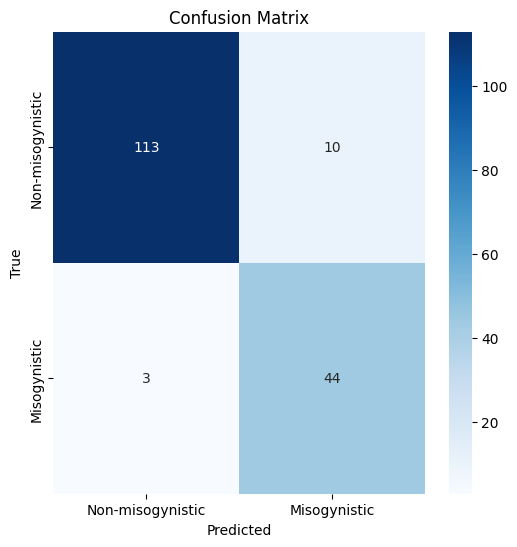

Precision: 0.8148
Recall: 0.9362
F1 Score: 0.8713
Macro F1 Score: 0.9084


In [18]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from torch.optim import AdamW  # For AdamW optimizer
from torch.utils.data import DataLoader, TensorDataset

# Define the device (CUDA if available, else CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the Multimodal Classifier with MLP, Batch Normalization, and Dropout
import torch
import torch.nn as nn

class MultimodalClassifier(nn.Module):
    def __init__(self, text_input_dim, image_input_dim, dropout_rate=0.39):
        super(MultimodalClassifier, self).__init__()
        # Concatenate both text and image features
        self.fc1 = nn.Linear(text_input_dim + image_input_dim, 512)
        self.bn1 = nn.BatchNorm1d(512)  # Batch Normalization
        self.dropout1 = nn.Dropout(dropout_rate)  # Dropout Layer
        self.fc2 = nn.Linear(512, 256)  # Hidden layer (new)
        self.bn2 = nn.BatchNorm1d(256)  # Batch Normalization
        self.dropout2 = nn.Dropout(0.38)  # Dropout Layer
        self.fc3 = nn.Linear(256, 2)  # Output layer for binary classification
        self.relu = nn.ReLU()

    def forward(self, text_features, image_features):
        # Concatenate text and image features
        combined_features = torch.cat((text_features, image_features), dim=-1)
        x = self.fc1(combined_features)
        x = self.bn1(x)  # Apply Batch Normalization
        x = self.relu(x)
        x = self.dropout1(x)  # Apply Dropout
        x = self.fc2(x)
        x = self.bn2(x)  # Apply Batch Normalization
        x = self.relu(x)
        x = self.dropout2(x)  # Apply Dropout
        x = self.fc3(x)
        return x


# Prepare the data (Assuming train_df and dev_df are already loaded with features)
X_train_text = torch.tensor(np.vstack(train_df['bert_embeddings'].values)).float().to(device)
X_train_image = torch.tensor(np.vstack(train_df['image_features'].values)).float().to(device)
y_train = torch.tensor(train_df['labels'].apply(lambda x: 1 if x == 'Misogyny' else 0).values).long().to(device)

X_dev_text = torch.tensor(np.vstack(dev_df['bert_embeddings'].values)).float().to(device)
X_dev_image = torch.tensor(np.vstack(dev_df['image_features'].values)).float().to(device)
y_dev = torch.tensor(dev_df['labels'].apply(lambda x: 1 if x == 'Misogyny' else 0).values).long().to(device)

# Convert to DataLoader for batching
batch_size = 128  # Adjust the batch size as needed

train_data = TensorDataset(X_train_text, X_train_image, y_train)
dev_data = TensorDataset(X_dev_text, X_dev_image, y_dev)

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
dev_loader = DataLoader(dev_data, batch_size=batch_size, shuffle=False)

# Define the model
model = MultimodalClassifier(text_input_dim=X_train_text.shape[1], image_input_dim=X_train_image.shape[1]).to(device)

# Training parameters
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0016)

# Early stopping parameters
best_val_loss = float('inf')
patience = 5  # Number of epochs to wait before early stopping if no improvement
epochs_no_improve = 0

epochs = 30
for epoch in range(epochs):
    model.train()
    total_loss = 0.0

    for batch in train_loader:
        # Get the batch data
        batch_text, batch_image, batch_labels = batch

        # Move data to device (GPU or CPU)
        batch_text = batch_text.to(device)
        batch_image = batch_image.to(device)
        batch_labels = batch_labels.to(device)

        optimizer.zero_grad()  # Zero the gradients
        outputs = model(batch_text, batch_image)
        loss = criterion(outputs, batch_labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Calculate the average loss for this epoch
    avg_train_loss = total_loss / len(train_loader)

    # Evaluate on validation data
    model.eval()
    val_loss = 0.0
    val_accuracy = 0
    val_f1 = 0
    with torch.no_grad():
        for batch in dev_loader:
            batch_text, batch_image, batch_labels = batch

            batch_text = batch_text.to(device)
            batch_image = batch_image.to(device)
            batch_labels = batch_labels.to(device)

            val_outputs = model(batch_text, batch_image)
            loss = criterion(val_outputs, batch_labels)

            val_loss += loss.item()

            _, predicted = torch.max(val_outputs, 1)
            val_accuracy += (predicted == batch_labels).sum().item()
            val_f1 += f1_score(batch_labels.cpu(), predicted.cpu(), average='macro')

    # Calculate average validation loss and accuracy
    avg_val_loss = val_loss / len(dev_loader)
    avg_val_accuracy = val_accuracy / len(dev_data)
    avg_val_f1 = val_f1 / len(dev_loader)

    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {avg_val_accuracy * 100:.2f}%, F1 Score: {avg_val_f1:.4f}")

    # Early stopping check
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1

    if epochs_no_improve >= patience:
        print("Early stopping triggered")
        break

# Final evaluation
model.eval()
with torch.no_grad():
    outputs = model(X_dev_text, X_dev_image)
    _, predicted = torch.max(outputs, 1)

final_accuracy = (predicted == y_dev).sum().item() / len(y_dev)
final_f1 = f1_score(y_dev.cpu(), predicted.cpu())

print(f"Final Accuracy on dev data: {final_accuracy * 100:.2f}%")
print(f"Final F1 Score on dev data: {final_f1:.4f}")

# Compute Confusion Matrix
cm = confusion_matrix(y_dev.cpu().numpy(), predicted.cpu().numpy())

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-misogynistic', 'Misogynistic'], yticklabels=['Non-misogynistic', 'Misogynistic'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Compute Precision, Recall, and F1 Score (Macro F1)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Alternatively, calculate the macro F1 score using sklearn
f1_macro = f1_score(y_dev.cpu(), predicted.cpu(), average='macro')
print(f"Macro F1 Score: {f1_macro:.4f}")


In [19]:
# Process test dataframe
test_df['bert_embeddings'] = test_df['transcriptions'].apply(get_bert_embeddings)
test_df['image_features'] = test_df['image_path'].apply(extract_image_features_vit)

# Convert to tensors
X_test_text = torch.tensor(np.vstack(test_df['bert_embeddings'].values)).float().to(device)
X_test_image = torch.tensor(np.vstack(test_df['image_features'].values)).float().to(device)

# Create DataLoader
test_data = TensorDataset(X_test_text, X_test_image)
test_loader = DataLoader(test_data, batch_size=128, shuffle=False)

# Evaluation
model.eval()
test_predictions = []

with torch.no_grad():
    for batch in test_loader:
        batch_text, batch_image = batch
        batch_text = batch_text.to(device)
        batch_image = batch_image.to(device)

        outputs = model(batch_text, batch_image)
        _, predicted = torch.max(outputs, 1)

        test_predictions.extend(predicted.cpu().numpy())

# Submission
submission_df = pd.DataFrame({
    "id": test_df['image_name'],
    "predictions": test_predictions
})

submission_df.to_csv('test_submission.csv', index=False, header=False)
print(submission_df.head())

         id  predictions
0  1582.jpg            0
1  1305.jpg            0
2   882.jpg            0
3   577.jpg            1
4  1342.jpg            1
